In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# defining model parameters
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 10
data_augmentation = False

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data();

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# converting 2D y array to 1D for plotting
y_train = y_train.reshape(-1,)    # or y_train.ravel()
print(y_train.shape)
print(y_train[:5])

(50000,)
[6 9 9 4 1]


In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_sample(X, y, ind):
  plt.figure(figsize = (16,4))
  plt.imshow(X[ind])
  plt.xlabel(classes[y[ind]])

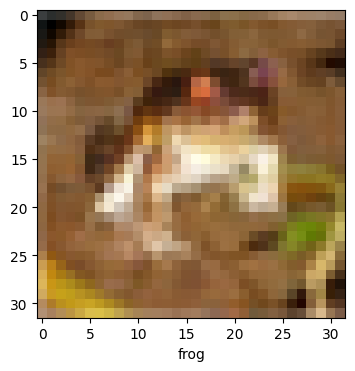

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
# Normalizing the data
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#sgd = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.9542 - accuracy: 0.2905 - val_loss: 1.7285 - val_accuracy: 0.3754
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5650 - accuracy: 0.4395 - val_loss: 1.4763 - val_accuracy: 0.4809
Epoch 3/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4153 - accuracy: 0.4928 - val_loss: 1.4787 - val_accuracy: 0.4722
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.3208 - accuracy: 0.5322 - val_loss: 1.3323 - val_accuracy: 0.5231
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.2499 - accuracy: 0.5595 - val_loss: 1.2371 - val_accuracy: 0.5619
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1773 - accuracy: 0.5880 - val_loss: 1.1582 - val_accuracy: 0.5944
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1175 - accuracy: 0.6094 - val_loss: 1.1395 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


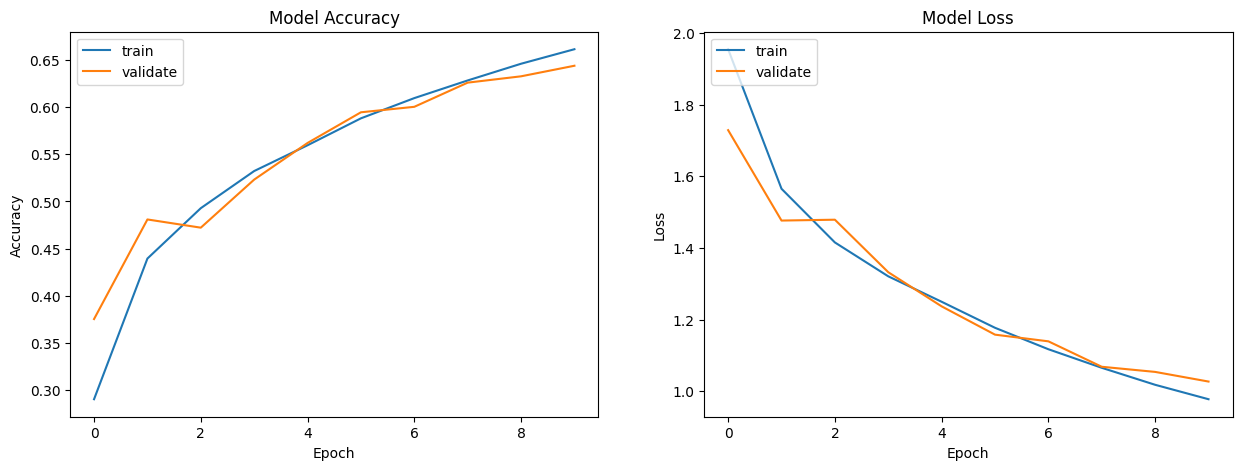

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 4s 12ms/step - loss: 1.0274 - accuracy: 0.6437
Test loss: 1.027353048324585
Test accuracy: 0.6437000036239624


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

# predicting results
y_pred = model.predict(x_test)
# considering the closest class from the predicted classes : np.argmax()
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.67      0.69      1000
           1       0.69      0.81      0.75      1000
           2       0.55      0.51      0.53      1000
           3       0.52      0.41      0.46      1000
           4       0.59      0.59      0.59      1000
           5       0.56      0.56      0.56      1000
           6       0.67      0.77      0.72      1000
           7       0.67      0.74      0.71      1000
           8       0.67      0.82      0.74      1000
           9       0.81      0.55      0.65      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



In [ ]:
y_pred_classes

array([3, 1, 8, ..., 5, 1, 7])

In [ ]:
y_test = y_test.reshape(-1,)

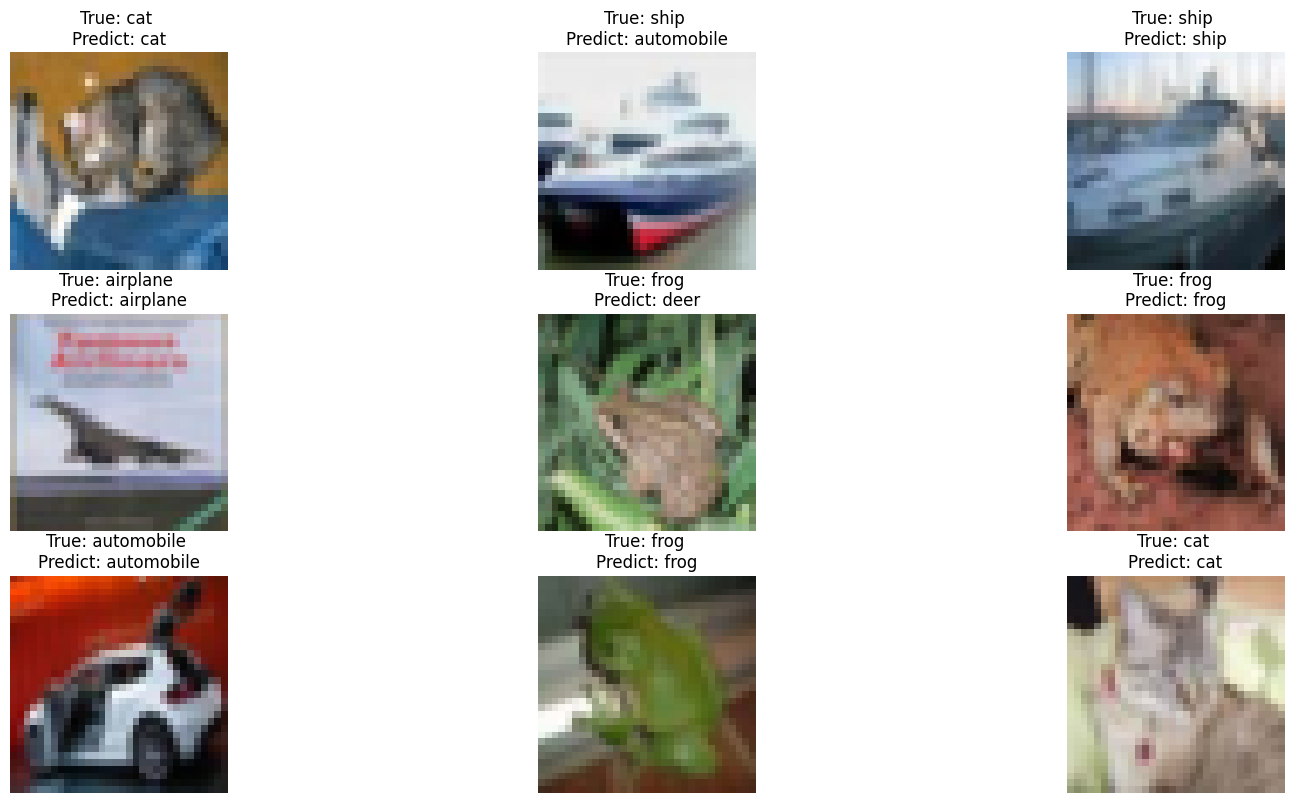

In [ ]:
R = 3
C = 3
fig, axes = plt.subplots(R, C, figsize=(16,8))
fig.tight_layout()
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (classes[y_test[i]], classes[y_pred_classes[i]]))
    axes[i].axis('off')